# Analysis of BA-POSGMCP using PUCT  for Driving 14X14Environment


Here we focus solely on **same-play** as in for the ad-hoc team play setting.

In [25]:
import sys
import pathlib

# Add ba-posgmcp/experiments/Driving directory to python Path
# So we can import experiment specific code
sys.path.append("/home/jonathon/code/ba-posgmcp/experiments/Driving")

import os.path as osp
from typing import List, Any, Optional, Tuple, Callable, Dict
from itertools import permutations, product

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import posggym

import plot_utils

# Data Loading

## RL Data

In [2]:
rl_results_dir = "2022-08-13_driving14x14/pairwise_comparison_initseed0_numseeds1_2022-08-15_04-48-19im2_mpte"

columns_to_drop = [
    'Unnamed: 0', 
    'episode_step_limit', 
    'time_limit', 
    'use_checkpointing',
    'search_time_mean', 
    'search_time_std', 
    'update_time_mean', 
    'update_time_std',
    'reinvigoration_time_mean', 
    'reinvigoration_time_std', 
    'policy_calls_mean', 
    'policy_calls_std', 
    'inference_time_mean', 
    'inference_time_std',
    'episode_dones',
]
rl_df = plot_utils.import_results(rl_results_dir, columns_to_drop, False)

# rl_df = rl_df[
#     rl_df["exp_id"].isin(
#         rl_df[
#             (rl_df["K"].isin(ba_df["rollout_K"]))
#             & (rl_df["train_seed"].isin(ba_df["rollout_seed"]))
#             & (rl_df["coplayer_K"].isin(ba_df["coplayer_K"]))
#         ]["exp_id"]
#     )
# ]

rl_df.columns
plot_utils.validate_and_display(rl_df, False)
rl_df

Agent IDs: [0 1]
Test Env: Driving14x14WideRoundAbout-v0
Seeds: [0]
Policy K: ['-1' '0' '1' '2' '3' '4' 'BR']
Policy Names: ['PPOPolicy_pi_0' 'PPOPolicy_pi_1' 'PPOPolicy_pi_2' 'PPOPolicy_pi_3'
 'PPOPolicy_pi_4' 'PPOPolicy_pi_BR' 'RandomPolicy']
Train Envs:: ['Driving14x14WideRoundAbout-v0']
Train Seeds: [0 1 2 3 4]
Train Algorithms: ['klr']
Coplayer Policy K: ['-1' '0' '1' '2' '3' '4' 'BR']
Coplayer Train Seed: [0 1 2 3 4]
Num rows/entries: 1470
Num experiments: 735


,exp_id,agent_id,env_name,seed,num_episodes,policy_name,policy_dir,policy_id,eval_mode,search_depth_mean,...,prop_LOSS,prop_DRAW,prop_WIN,prop_NA,K,train_env_name,train_seed,train_alg,coplayer_K,coplayer_train_seed
0,313,0,Driving14x14WideRoundAbout-v0,0,1000,PPOPolicy_pi_1,train_klr_Driving14x14WideRoundAbout-v0_k4_see...,pi_1,True,0.0,...,0.053,0.0,0.912,0.035,1,Driving14x14WideRoundAbout-v0,1,klr,4,2
1,313,1,Driving14x14WideRoundAbout-v0,0,1000,PPOPolicy_pi_4,train_klr_Driving14x14WideRoundAbout-v0_k4_see...,pi_4,True,0.0,...,0.053,0.0,0.947,0.000,4,Driving14x14WideRoundAbout-v0,2,klr,1,1
2,465,0,Driving14x14WideRoundAbout-v0,0,1000,PPOPolicy_pi_2,train_klr_Driving14x14WideRoundAbout-v0_k4_see...,pi_2,True,0.0,...,0.358,0.0,0.618,0.024,2,Driving14x14WideRoundAbout-v0,2,klr,2,2
3,465,1,Driving14x14WideRoundAbout-v0,0,1000,PPOPolicy_pi_2,train_klr_Driving14x14WideRoundAbout-v0_k4_see...,pi_2,True,0.0,...,0.352,0.0,0.628,0.020,2,Driving14x14WideRoundAbout-v0,2,klr,2,2
4,541,0,Driving14x14WideRoundAbout-v0,0,1000,RandomPolicy,train_klr_Driving14x14WideRoundAbout-v0_k4_see...,pi_-1,None,0.0,...,0.035,0.0,0.000,0.965,-1,Driving14x14WideRoundAbout-v0,2,klr,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,454,1,Driving14x14WideRoundAbout-v0,0,1000,PPOPolicy_pi_BR,train_klr_Driving14x14WideRoundAbout-v0_k4_see...,pi_BR,True,0.0,...,0.146,0.0,0.854,0.000,BR,Driving14x14WideRoundAbout-v0,2,klr,0,2
1466,322,0,Driving14x14WideRoundAbout-v0,0,1000,PPOPolicy_pi_3,train_klr_Driving14x14WideRoundAbout-v0_k4_see...,pi_3,True,0.0,...,0.002,0.0,0.996,0.002,3,Driving14x14WideRoundAbout-v0,1,klr,-1,2
1467,322,1,Driving14x14WideRoundAbout-v0,0,1000,RandomPolicy,train_klr_Driving14x14WideRoundAbout-v0_k4_see...,pi_-1,None,0.0,...,0.002,0.0,0.000,0.998,-1,Driving14x14WideRoundAbout-v0,2,klr,3,1
1468,485,0,Driving14x14WideRoundAbout-v0,0,1000,PPOPolicy_pi_BR,train_klr_Driving14x14WideRoundAbout-v0_k4_see...,pi_BR,True,0.0,...,0.025,0.0,0.956,0.019,BR,Driving14x14WideRoundAbout-v0,2,klr,1,2


## BA-NRMCP Data

In [3]:
ba_results_dir_name = '2022-08-13_driving14x14/baposgmcp_exp_3240'

ba_columns_to_drop = [
    "Unnamed: 0",
    'Unnamed: 0.1',
    'Unnamed: 0.2', 
    "args",
    "episode_step_limit",
    "time_limit",
    "use_checkpointing",
    "reinvigoration_time_mean",
    "reinvigoration_time_std",
    "inference_time_mean",
    "inference_time_std",
    "policy_calls_mean",
    "policy_calls_std",
#     "search_time_mean",
#     "search_time_std",
#     "update_time_mean",
#     "update_time_std",
    "episode_returns_mean",
    "episode_returns_std",
    "episode_returns_max",
    "episode_returns_min",
    "episode_discounted_returns_max",
    "episode_discounted_returns_min",
    "episode_dones",
]

ba_df = plot_utils.import_results(ba_results_dir_name, ba_columns_to_drop, True)
plot_utils.validate_and_display(ba_df, True)

ba_only_df = ba_df[ba_df["K"] == "BA"]
print("BA-NRMCP Rollout Policy IDs:", list(ba_only_df["rollout_policy_ids"].unique()))
# Just hardcode it and save parsing
ba_rollout_policy_ids = ['pi_0', 'pi_1', 'pi_2', 'pi_3', 'pi_4']
ba_rollout_Ks = ["0", "1", "2", "3", "4"]

Agent IDs: [0 1]
Test Env: Driving14x14WideRoundAbout-v0
Seeds: [0 1 2 3]
Policy K: ['-1' '0' '1' '2' '3' '4' 'BA' 'BR']
Policy Names: ['BAPOSGMCP_0' 'PPOPolicy_pi_0' 'PPOPolicy_pi_1' 'PPOPolicy_pi_2'
 'PPOPolicy_pi_3' 'PPOPolicy_pi_4' 'PPOPolicy_pi_BR' 'RandomPolicy']
Coplayer Policy K: ['-1' '0' '1' '2' '3' '4' 'BA' 'BR']
Coplayer Train Seed: [2 'None' 4 0 3 1]
Num rows/entries: 7496
Num experiments: 3748

BAPOSGMCP Hyperparameters
Num sims: ['1024' '128' '32' '512' '8']
Rollout Policy K: ['BR']
Rollout Policy IDs: ['pi_BR']
Rollout Policy Seeds: [0 1 2 3 4]
Rollout Policy Algs: ['klr']
Other Agent Policy Algs: ['klr']
Other Agent Policy Seeds: [0 1 2 3 4]
other_policy_prior: None
truncated: True
c_init: 1.25
c_base: 20000.0
reinvigorator: <baposgmcp.tree.reinvigorate.BABeliefRejectionSampler object at 0x7ee9036c7b20> + other values
extra_particles_prop: 0.0625
step_limit: 50
epsilon: 0.01
BA-NRMCP Rollout Policy IDs: ["['pi_0', 'pi_1', 'pi_2', 'pi_3', 'pi_4']"]


In [4]:
print("Columns:")
for c in ba_df.columns:
    print(c)

Columns:
exp_id
agent_id
env_name
seed
num_episodes
policy_name
other_policy_prior
num_sims
c_init
c_base
truncated
reinvigorator
extra_particles_prop
step_limit
epsilon
policy_id
other_agent_policy_dir
other_agent_policy_ids
rollout_policy_ids
rollout_policy_dir
eval_mode
policy_dir
state_accuracy
state_accuracy_0
state_accuracy_1
state_accuracy_2
state_accuracy_3
state_accuracy_4
state_accuracy_5
state_accuracy_6
state_accuracy_7
state_accuracy_8
state_accuracy_9
state_accuracy_10
state_accuracy_11
state_accuracy_12
state_accuracy_13
state_accuracy_14
state_accuracy_15
state_accuracy_16
state_accuracy_17
state_accuracy_18
state_accuracy_19
state_accuracy_20
state_accuracy_21
state_accuracy_22
state_accuracy_23
state_accuracy_24
state_accuracy_25
state_accuracy_26
state_accuracy_27
state_accuracy_28
state_accuracy_29
state_accuracy_30
state_accuracy_31
state_accuracy_32
state_accuracy_33
state_accuracy_34
state_accuracy_35
state_accuracy_36
state_accuracy_37
state_accuracy_38
state_ac

# The environment

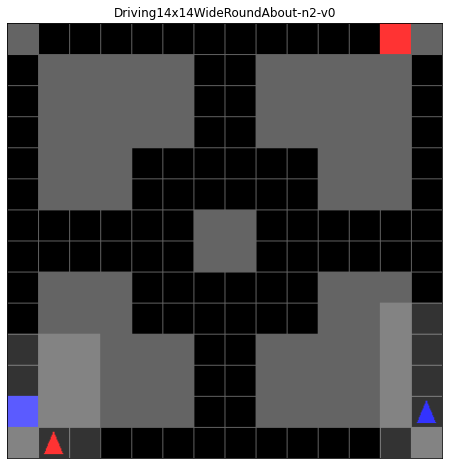

In [5]:
plot_utils.plot_environment("Driving14x14WideRoundAbout-n2-v0")    
plt.show()

### Helper functions

The next few code blocks contain functions for plotting and cleaning data.

In [7]:
def get_all_mean_ba_pw_values(plot_df, y_key: str):
    """Get pairwise mean values for num_sims vs coplayer policy."""
    ba_only_plot_df = plot_utils.filter_by(plot_df, [("K", "==", "BA")])

    num_sims = ba_only_plot_df["num_sims"].unique().tolist()
    num_sims = [int(n) for n in num_sims]
    num_sims.sort()
    print(f"{num_sims=}")

    ba_coplayer_df = plot_df[plot_df["K"] != "BA"]
    coplayer_K = ba_coplayer_df["K"].unique().tolist()
    coplayer_K.sort()
    print(f"{coplayer_K=}")
    
    sp_pw_returns = np.zeros((len(num_sims), len(coplayer_K)))

    for r, r_num_sims in enumerate(num_sims):
        for c, cp_K in enumerate(coplayer_K):
            rc_plot_df = plot_utils.filter_exps_by(plot_df, [("K", "==", "BA"), ("num_sims", "==", str(r_num_sims))])
            rc_plot_df = plot_utils.filter_exps_by(rc_plot_df, [("K", "==", cp_K)])
            
            # Checks
            ba_only_df = rc_plot_df[rc_plot_df["K"] == "BA"]
            assert len(ba_only_df["num_sims"].unique()) <= 1
            if len(ba_only_df["num_sims"].unique()) == 0:
                print(f"Missing data for {r=} {r_num_sims=} {c=} {cp_K=}")
                continue
            
            cp_only_df = rc_plot_df[rc_plot_df["K"] != "BA"]
            assert len(cp_only_df["K"].unique()) == 1
            
            sp_return, _ = plot_utils.get_mean_pairwise_values(
                rc_plot_df,
                row_conds=[("K", "==", "BA")],
                row_seed_key="rollout_seed",
                row_alg_key="rollout_alg",
                col_conds=[("K", "!=", "BA")],
                col_seed_key="train_seed",
                col_alg_key="train_alg",
                y_key=y_key
            )

            sp_pw_returns[r][c] = sp_return
    
    return (num_sims, coplayer_K), sp_pw_returns

In [8]:
def get_rl_values(plot_df,
                  y_key: str, 
                  y_err_key: Optional[str] = None,
                  include_K: Optional[List[str]] = None,
                  include_cp_K: Optional[List[str]] = None):
    if include_K is None:
        include_K = plot_df["K"].unique().tolist()
        include_K.sort()
    
    if include_cp_K is None:
        include_cp_K = plot_df["coplayer_K"].unique().tolist()
        include_cp_K.sort()
        
    (Ks, cp_Ks), sp_values, _ = plot_utils.get_all_mean_pairwise_values(plot_df, y_key)
    
    if y_err_key:
        _, sp_err_values, _ = plot_utils.get_all_mean_pairwise_values(plot_df, y_err_key)
    
    shape = (len(include_K), len(include_cp_K))
    keep_sp_values = np.zeros(shape)
    keep_sp_err_values = np.zeros(shape)

    for r, K in enumerate(include_K):
        K_idx = Ks.index(K)
        for c, cp_K in enumerate(include_cp_K):
            cp_K_idx = cp_Ks.index(cp_K)
            
            keep_sp_values[r][c] = sp_values[K_idx][cp_K_idx]
            
            if y_err_key:
                keep_sp_err_values[r][c] = sp_err_values[K_idx][cp_K_idx]

    return (include_K, include_cp_K), keep_sp_values, keep_sp_err_values
    

In [9]:
def lineplot_ba_values(plot_df, 
                       y_key: str, 
                       y_err_key: str,
                       rl_comparison_K: List[str], 
                       plot_rl_df: Optional,
                       vrange: Optional[Tuple[float, float]] = None,
                       figsize: Optional[Tuple[int, int]] = None,
                       save_fig: bool = False):
    """Plot different BA rollout policies self-play and cross-play values against 
    num sims for different for the different co-player policies
    """
    ba_only_df = plot_df[plot_df["K"] == "BA"]
    rollout_Ks = ba_only_df["rollout_K"].unique().tolist()
    rollout_Ks.sort()
    print(f"{rollout_Ks=}")
    
    coplayer_Ks = ba_only_df["coplayer_K"].unique().tolist()
    coplayer_Ks.sort()
    print(f"{coplayer_Ks=}")
    
    if rl_comparison_K:
        (rl_Ks, rl_cp_Ks), rl_sp_values, rl_sp_err_values = get_rl_values(
            plot_rl_df, y_key, y_err_key, rl_comparison_K, coplayer_Ks
        )
    
    ncols = len(coplayer_Ks)
    nrows = len(rollout_Ks)
    if figsize is None:
        figsize = (14, 2+nrows*4)
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, squeeze=False)
    
    for row, rollout_K in enumerate(rollout_Ks):
        print(f"{row=} {rollout_K=}")
        ba_df_r_k = plot_utils.filter_exps_by(ba_df, [("K", "==", "BA"), ("rollout_K", "==", rollout_K)])
        (row_num_sims, row_cp_Ks), row_sp_values = get_all_mean_ba_pw_values(ba_df_r_k, y_key=y_key)
        _, row_sp_errs = get_all_mean_ba_pw_values(ba_df_r_k, y_key=y_err_key)
        
        if vrange is None:
            min_value = np.nanmin(row_sp_values - row_sp_errs)
            max_value = np.nanmax(row_sp_values + row_sp_errs)
            vrange = (min_value - (min_value*0.05), max_value + (max_value*0.05))
        
        for i, cp_K in enumerate(coplayer_Ks):
            print(f"  {i=} {cp_K=}")
            ax = axs[row][i]
            
            # Add SP second since it may not be present for some cp_K
            sp_ys = row_sp_values[:, i]
            if not np.isnan(np.sum(sp_ys)):
                sp_errs = row_sp_errs[:, i]
                ax.errorbar(row_num_sims, sp_ys, yerr=sp_errs, label="SP-BA")
            
                if rl_comparison_K:
                    rl_cp_K_i = rl_cp_Ks.index(cp_K)
                    for rl_i, rl_K in enumerate(rl_Ks):
                        rl_i_sp_ys = [rl_sp_values[rl_i][rl_cp_K_i]] * len(row_num_sims)
                        rl_i_sp_errs = [rl_sp_err_values[rl_i][rl_cp_K_i]] * len(row_num_sims)
                        ax.errorbar(row_num_sims, rl_i_sp_ys, yerr=rl_i_sp_errs, label=f"SP-RL-{rl_K}")
            
            ax.set_xlabel("Num simulations")
            ax.set_title(cp_K)
            ax.set_ylim(vrange)
            ax.legend()

        axs[row][0].set_ylabel(f"{rollout_K}")
    
    fig.suptitle(y_key)
    fig.tight_layout()
    if save_fig:
        fig.savefig(osp.join(exp_utils.EXP_BASE_DIR, "figures", f"{y_key}.png"))

In [15]:
def get_all_values(plot_ba_df, plot_rl_df, y_key: str):
    """Get values for BAPOSGMCP for each num_sims, and for each rl policy."""
    ba_only_df = plot_ba_df[plot_ba_df["K"] == "BA"]
    
    coplayer_Ks = ba_only_df["coplayer_K"].unique().tolist()
    coplayer_Ks.sort()
    print(f"{coplayer_Ks=}")
    
    (rl_sp_Ks, _), rl_sp_values, rl_sp_err_values = get_rl_values(
        plot_rl_df, y_key, None, None, coplayer_Ks
    )
    
    ba_df_r_k = plot_utils.filter_exps_by(plot_ba_df, [("K", "==", "BA")])
    (ba_num_sims, ba_cp_Ks), ba_sp_values = get_all_mean_ba_pw_values(ba_df_r_k, y_key=y_key)
    
    values = np.vstack([ba_sp_values, rl_sp_values])
    row_labels = ba_num_sims + rl_sp_Ks
    col_labels = ba_cp_Ks
    
    return (row_labels, col_labels), values

In [55]:
def plot_all_values(row_labels, 
                    col_labels,
                    values,
                    coplayer_policy_dist: Optional[Dict[str, float]] = None,
                    meta_policy_dist: Optional[Dict[str, float]] = None,
                    vrange: Optional[Tuple[float, float]] = None,
                    figsize: Optional[Tuple[int, int]] = None):
    """Plot values against num sims for BA and also RL policies."""
    ncols = 1
    nrows = 1
    if figsize is None:
        figsize = (ncols*4, nrows*3)
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, squeeze=False)
    
    # makes copies since we add values to them
    row_labels = [*row_labels]
    col_labels = [*col_labels]
        
    if coplayer_policy_dist:
        exp_values = np.zeros((len(row_labels), 1))
        for i, row in enumerate(values):
            exp_val = 0.0
            for cp_k, prob in cp_dist.items():
                cp_idx = col_labels.index(str(cp_k))
                exp_val += prob * row[cp_idx]
            exp_values[i][0] = exp_val

        values = np.hstack((values, exp_values))
        col_labels.append("E")
        
    if meta_policy_dist:
        meta_values = np.zeros((1, len(col_labels)))
        for col, col_K in enumerate(col_labels):
            meta_val = 0.0
            for i, (meta_k, prob) in enumerate(meta_policy_dist.items()):
                meta_row = row_labels.index(str(meta_k))
                meta_val += values[meta_row][col] * prob
            meta_values[0][col] = meta_val
        
        values = np.vstack((values, meta_values))
        row_labels.append("M")
            
    if vrange is None:
        min_value = np.nanmin(row_sp_values)
        max_value = np.nanmax(row_sp_values)
        vrange = (min_value, max_value)

    plot_utils.plot_pairwise_heatmap(axs[0][0], (row_labels, col_labels), values, vrange=vrange)

    fig.tight_layout()
    

# RL Analysis

### RL Pairwise Policy Performance

Here we look at the performance for each possible pairing of (policy_id, train_seed).

For each performance metric we have a grid of (grid)-plots:
    
- Outer-grid: train seed X train seed
- Inner-grid: policy_id X policy_id

Averaging duplicates. FYI


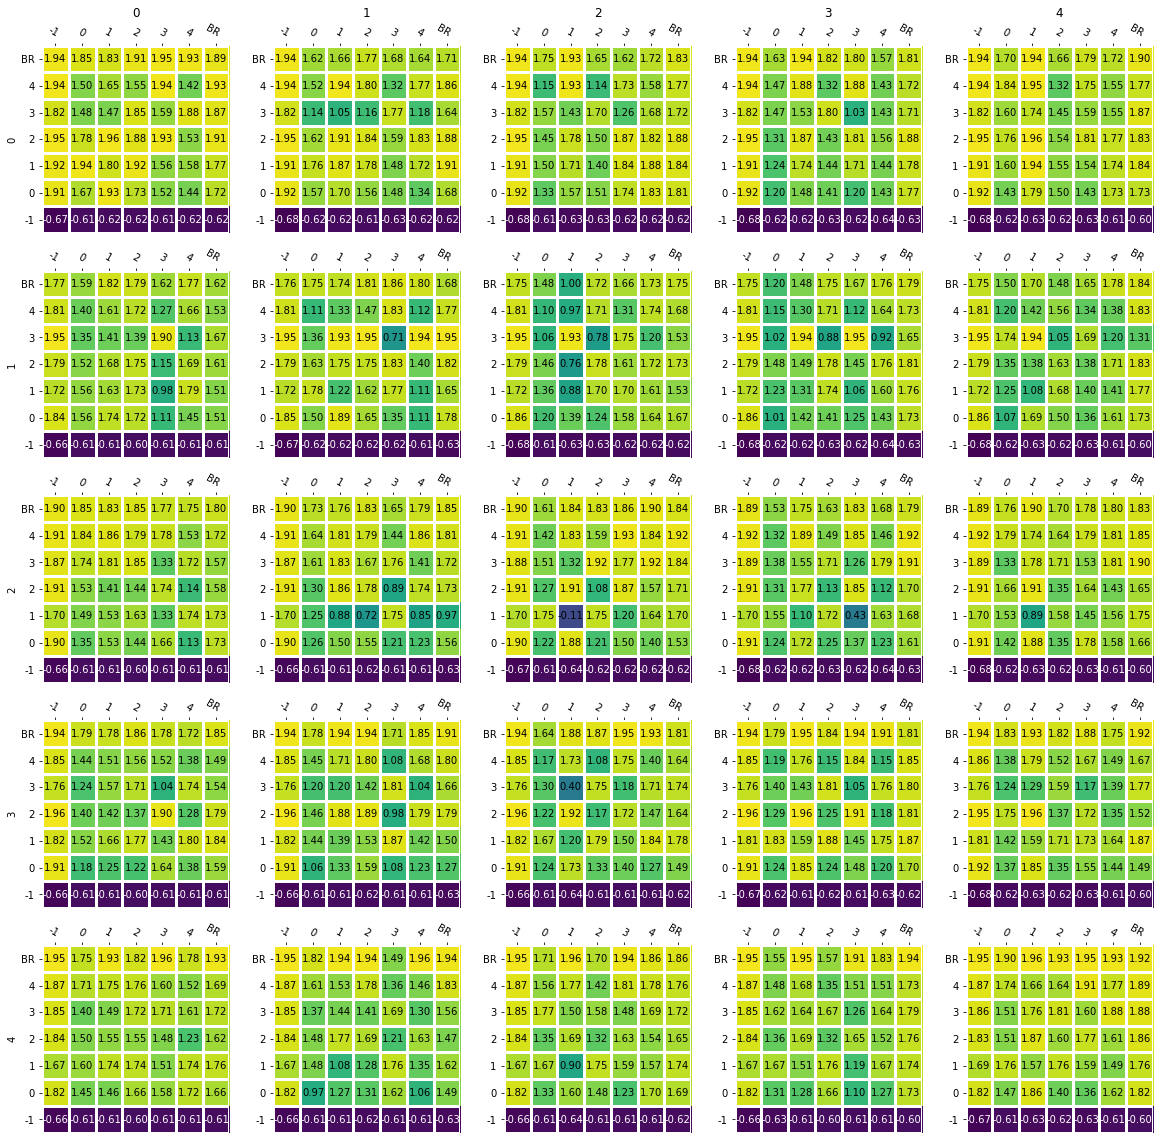

In [11]:
plot_utils.plot_pairwise_policy_comparison(
    rl_df, y_key="episode_discounted_returns_mean", vrange=(-0.7, 2.0), figsize=(20, 20), valfmt="{x:.2f}"
)

### RL average policy performance

Here we look at average performance of the policies learned using RL by themselves (without additional search).

Each plot shows the *mean performance* for the *row* policy against the *column* policy.

The **left-hand plot** shows *same-play* performance. So performance of policies against policies from the same training population (same training algorithm and same seed).

The **middle plot** shows *cross-play* performance. So performance of policies against policies from different training populations (against policies trained using a different algorithm and/or different seed).

The **right-hand plot** shows the generalization gap which is just the difference between the *Same-Play* and *Cross-Play* performance.

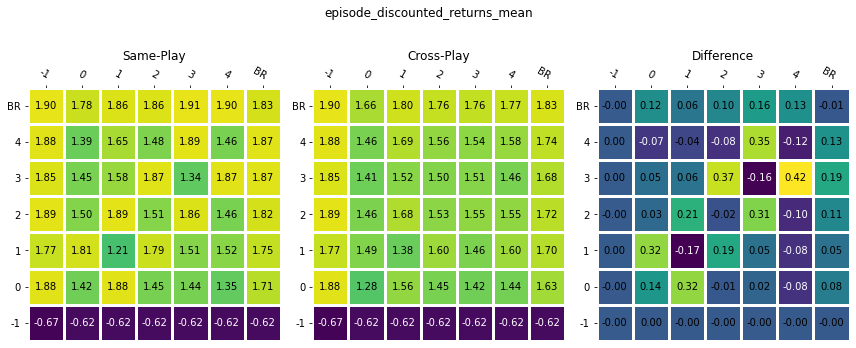

In [13]:
plot_utils.plot_mean_pairwise_comparison(rl_df, "episode_discounted_returns_mean", vrange=(-0.7, 2.0))
plt.show()

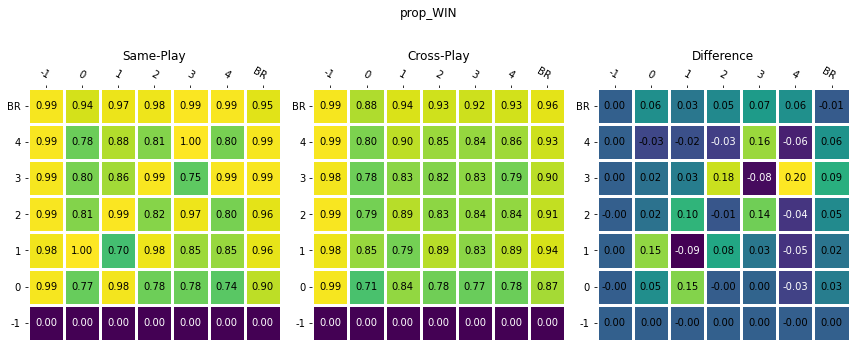

In [14]:
plot_utils.plot_mean_pairwise_comparison(rl_df, "prop_WIN", vrange=(0.0, 1.0))
plt.show()

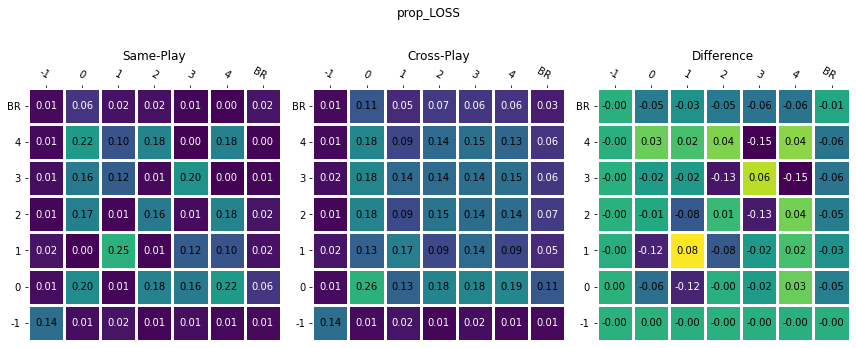

In [15]:
# Proportion of episodes the row agent crashed. I.e. the collision rate.
plot_utils.plot_mean_pairwise_comparison(rl_df, "prop_LOSS", vrange=(0.0, 0.4))
plt.show()

### Example recorded episodes

In [ ]:
# plot_utils.plot_pairwise_policy_comparison(
#     rl_df, 
#     y_key="exp_id", 
#     vrange=(0.0, 0.0), 
#     figsize=(20, 20), 
#     valfmt="{x:.0f}", 
#     average_duplicates=False
# )

# BAPOSGMCP Analysis

For this run we tested BAPOSGMCP with:

rollout_policy_ids=(pi_0 pi_1 pi_2 pi_3 pi_4)

baposgmcp_other_policy_ids=(pi_-1 pi_0 pi_1 pi_2 pi_3)

exp_other_policy_ids=(pi_-1 pi_0 pi_1 pi_2 pi_3 pi_4 pi_BR)

In [57]:
cp_dist_Ks = [0, 1, 2, 3]
cp_dist = {k: 1.0 / len(cp_dist_Ks) for k in cp_dist_Ks}

# uniform since pr(meta_k) = pr(cp_K-1)
meta_dist_Ks = [1, 2, 3, 4]
meta_dist = {k: 1.0 / len(cp_dist_Ks) for k in meta_dist_Ks}

print(f"{cp_dist=}")
print(f"{meta_dist=}")

cp_dist={0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
meta_dist={1: 0.25, 2: 0.25, 3: 0.25, 4: 0.25}


## Averaging data over seeds

First step is to collate all the different seeds of the same experiment parameters.

In [34]:
group_keys = [
    "agent_id", 
    "K",
    "num_sims", 
    "coplayer_K",
    "coplayer_train_seed",
    "coplayer_num_sims",
    "coplayer_other_seed",
    "train_seed", 
    "train_alg",
    "rollout_K", 
    "rollout_seed",
    "rollout_alg",
    "other_alg",
    "other_seed"
]

groups = ba_df.groupby(group_keys)

new_df = groups["episode_discounted_returns_mean"].mean().reset_index()
new_df["exp_id"] = groups["exp_id"].min().reset_index()["exp_id"]
new_df["num_episodes"] = groups["num_episodes"].sum().reset_index()["num_episodes"]
new_df["episode_steps_mean"] = groups["episode_steps_mean"].mean().reset_index()["episode_steps_mean"]
new_df["episode_times_mean"] = groups["episode_times_mean"].mean().reset_index()["episode_times_mean"]
new_df["prop_WIN"] = groups["prop_WIN"].mean().reset_index()["prop_WIN"]
new_df["prop_LOSS"] = groups["prop_LOSS"].mean().reset_index()["prop_LOSS"]

new_df.sort_values(["agent_id", "num_sims"], inplace=True)

print(new_df)
print(new_df["K"].unique())

      agent_id   K num_sims coplayer_K coplayer_train_seed coplayer_num_sims  \
0            0  BA     1024         -1                   0              None   
1            0  BA     1024         -1                   0              None   
2            0  BA     1024         -1                   0              None   
3            0  BA     1024         -1                   0              None   
4            0  BA     1024         -1                   0              None   
...        ...  ..      ...        ...                 ...               ...   
1745         1  BR     None         BA                None                 8   
1746         1  BR     None         BA                None                 8   
1747         1  BR     None         BA                None                 8   
1748         1  BR     None         BA                None                 8   
1749         1  BR     None         BA                None                 8   

     coplayer_other_seed train_seed tra

rollout_Ks=['BR']
coplayer_Ks=['-1', '0', '1', '2', '3', '4', 'BR']
row=0 rollout_K='BR'
num_sims=[8, 32, 128, 512, 1024]
coplayer_K=['-1', '0', '1', '2', '3', '4', 'BR']


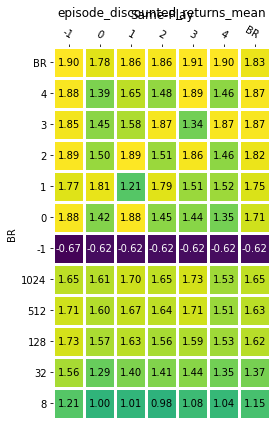

In [14]:
plot_baposgmcp_values(
    new_df, 
    y_key="episode_discounted_returns_mean", 
    include_rl_comparison=True, 
    plot_rl_df=rl_df,
    vrange=(-0.7, 1.9),
    figsize=(12, 6)
)
plt.show()

In [54]:
(row_labels, col_labels), values = get_all_values(new_df, rl_df, "episode_discounted_returns_mean")

coplayer_Ks=['-1', '0', '1', '2', '3', '4', 'BR']
num_sims=[8, 32, 128, 512, 1024]
coplayer_K=['-1', '0', '1', '2', '3', '4', 'BR']


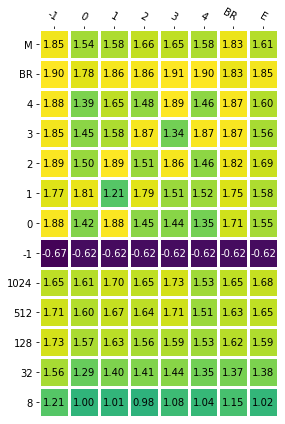

In [58]:
plot_all_values(
    row_labels, 
    col_labels,
    values,
    coplayer_policy_dist=cp_dist,
    meta_policy_dist=meta_dist,
    vrange=(-0.7, 1.9),
    figsize=(12, 6)
)
plt.show()

In [60]:
(win_row_labels, win_col_labels), win_values = get_all_values(new_df, rl_df, "prop_WIN")

coplayer_Ks=['-1', '0', '1', '2', '3', '4', 'BR']
num_sims=[8, 32, 128, 512, 1024]
coplayer_K=['-1', '0', '1', '2', '3', '4', 'BR']


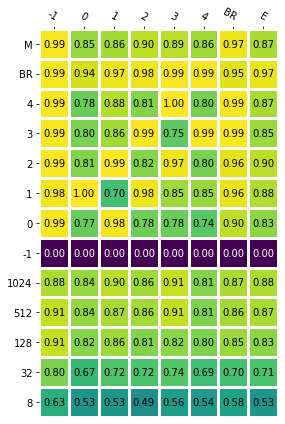

In [61]:
plot_all_values(
    win_row_labels, 
    win_col_labels,
    win_values,
    coplayer_policy_dist=cp_dist,
    meta_policy_dist=meta_dist,
    vrange=(0.0, 1.0),
    figsize=(12, 6)
)
plt.show()

In [62]:
(loss_row_labels, loss_col_labels), loss_values = get_all_values(new_df, rl_df, "prop_LOSS")

coplayer_Ks=['-1', '0', '1', '2', '3', '4', 'BR']
num_sims=[8, 32, 128, 512, 1024]
coplayer_K=['-1', '0', '1', '2', '3', '4', 'BR']


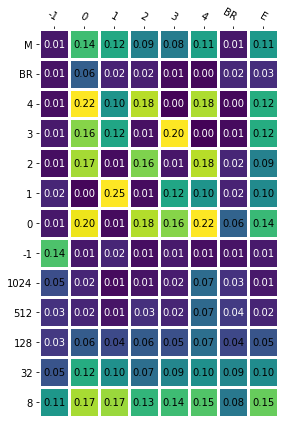

In [64]:
plot_all_values(
    loss_row_labels, 
    loss_col_labels,
    loss_values,
    coplayer_policy_dist=cp_dist,
    meta_policy_dist=meta_dist,
    vrange=(0.0, 0.2),
    figsize=(12, 6)
)
plt.show()

rollout_Ks=['BR']
coplayer_Ks=['-1', '0', '1', '2', '3', '4', 'BR']
row=0 rollout_K='BR'
num_sims=[8, 32, 128, 512, 1024]
coplayer_K=['-1', '0', '1', '2', '3', '4', 'BR']
num_sims=[8, 32, 128, 512, 1024]
coplayer_K=['-1', '0', '1', '2', '3', '4', 'BR']
  i=0 cp_K='-1'
  i=1 cp_K='0'
  i=2 cp_K='1'
  i=3 cp_K='2'
  i=4 cp_K='3'
  i=5 cp_K='4'
  i=6 cp_K='BR'


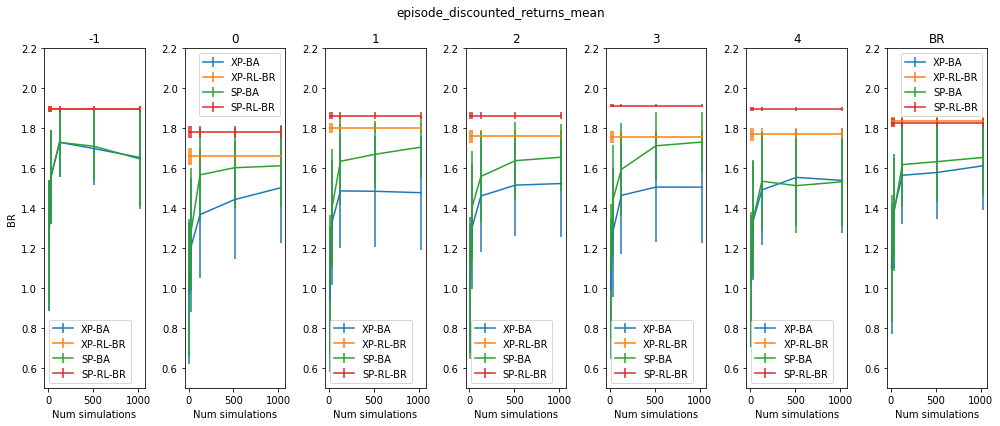

In [22]:
lineplot_ba_values(
    new_df, 
    y_key="episode_discounted_returns_mean",
    y_err_key="episode_discounted_returns_CI",
    rl_comparison_K=["BR"], 
    plot_rl_df=rl_df,
    vrange=(0.5, 2.2),
    figsize=(14, 6)
)
plt.show()

# BA-NRMCP Beliefs Deeper dive

In the following plots we taker deeper dive into understanding the belief of BA-NRMCP.

For this analysis we restrict ourselves to a single experiment seed (100 episodes total). This is mainly for ease of analysis.

In [23]:
ba0_df = ba_df[ba_df["seed"] == 0]
plot_utils.validate_and_display(ba0_df, True)

# Result keys relating to agent beliefs
s_acc_key = "state_accuracy"
h_acc_key = "history_accuracy"
pi_distance_key = "action_dist_distance"
bayes_acc_key = "bayes_accuracy"

ba_agent_ids = ba_df[ba_df["K"] == "BA"]["agent_id"].unique()
assert len(ba_agent_ids) == 1, f"{ba_agent_ids=}"
ba_agent_id = ba_agent_ids[0]
cp_agent_id = (ba_agent_id + 1) % 2
print(f"{ba_agent_id=}")

step_limit = int(ba_df["step_limit"].unique()[0])
print(f"{step_limit=}")

num_seeds = len(ba_df["seed"].unique())

print()
for c in ba_df.columns:
    print(c)

Agent IDs: [0 1]
Test Env: Driving14x14WideRoundAbout-v0
Seeds: [0]
Policy K: ['-1' '0' '1' '2' '3' '4' 'BA' 'BR']
Policy Names: ['BAPOSGMCP_0' 'PPOPolicy_pi_0' 'PPOPolicy_pi_1' 'PPOPolicy_pi_2'
 'PPOPolicy_pi_3' 'PPOPolicy_pi_4' 'PPOPolicy_pi_BR' 'RandomPolicy']
Coplayer Policy K: ['-1' '0' '1' '2' '3' '4' 'BA' 'BR']
Coplayer Train Seed: [0 'None' 1 3 2 4]
Num rows/entries: 1894
Num experiments: 947

BAPOSGMCP Hyperparameters
Num sims: ['1024' '128' '32' '512' '8']
Rollout Policy K: ['BR']
Rollout Policy IDs: ['pi_BR']
Rollout Policy Seeds: [0 1 2 3 4]
Rollout Policy Algs: ['klr']
Other Agent Policy Algs: ['klr']
Other Agent Policy Seeds: [0 1 2 3 4]
other_policy_prior: None
truncated: True
c_init: 1.25
c_base: 20000.0
reinvigorator: <baposgmcp.tree.reinvigorate.BABeliefRejectionSampler object at 0x7efb9808eca0> + other values
extra_particles_prop: 0.0625
step_limit: 50
epsilon: 0.01
ba_agent_id=0
step_limit=50

exp_id
agent_id
env_name
seed
num_episodes
policy_name
other_policy_prior

In [24]:
group_keys = [
    "agent_id", 
    "K",
    "num_sims", 
    "coplayer_K",
    "coplayer_train_seed",
    "coplayer_num_sims",
    "coplayer_other_seed",
    "train_seed", 
    "train_alg",
    "rollout_K", 
    "rollout_seed",
    "rollout_alg",
    "other_alg",
    "other_seed"
]

def CI(series):
    return 1.96 * np.std(series) / len(series)

ba_only_df = ba_df[ba_df["K"] == "BA"]

# CHANGE this to control the numsims and coplayer shown
ba_only_df = ba_only_df[(ba_only_df["coplayer_K"] == str(4)) & (ba_only_df["num_sims"] == str(512))]

groups = ba_only_df.groupby(group_keys)
ba_grouped_df = groups.agg([np.mean, np.std, CI]).reset_index()
ba_grouped_df.sort_values(["agent_id", "num_sims"], inplace=True)

print(ba_grouped_df)

   agent_id   K num_sims coplayer_K coplayer_train_seed coplayer_num_sims  \
                                                                            
0         0  BA      512          4                   0              None   
1         0  BA      512          4                   0              None   
2         0  BA      512          4                   0              None   
3         0  BA      512          4                   0              None   
4         0  BA      512          4                   0              None   
5         0  BA      512          4                   1              None   
6         0  BA      512          4                   1              None   
7         0  BA      512          4                   1              None   
8         0  BA      512          4                   1              None   
9         0  BA      512          4                   1              None   
10        0  BA      512          4                   2              None   

/tmp/ipykernel_291545/3882321701.py:27: FutureWarning: ['env_name', 'policy_name', 'other_policy_prior', 'c_init', 'c_base', 'truncated', 'reinvigorator', 'extra_particles_prop', 'step_limit', 'epsilon', 'policy_id', 'other_agent_policy_dir', 'other_agent_policy_ids', 'rollout_policy_ids', 'rollout_policy_dir', 'eval_mode', 'policy_dir', 'train_env_name', 'rollout_id'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  ba_grouped_df = groups.agg([np.mean, np.std, CI]).reset_index()


In [ ]:
def plot_stepwise_belief_stat(plot_df,
                              y_key: str,
                              ba_agent_id: int,
                              t_max: int,
                              is_cp_stat: bool,
                              y_lims=None):
    """Plot belief state (y_key) for each step."""
    
    def y_next_str(step_num):
        if is_cp_stat:
            return f"{y_key}_{cp_agent_id}_{step_num}"
        return f"{y_key}_{step_num}"
    
    ba_agent_seeds = plot_df["rollout_seed"].unique()
    ba_agent_seeds.sort()
    
    cp_agent_seeds = plot_df["coplayer_train_seed"].unique()
    cp_agent_seeds.sort()
    
    num_sims_all = plot_df["num_sims"].unique()
    num_sims_all = [int(n) for n in num_sims_all]
    num_sims_all.sort()
    
    xs = list(range(t_max))
    
    sp_df = plot_df[plot_df[["rollout_seed", "coplayer_train_seed"]].nunique(axis=1) == 1]
    xp_df = plot_df[plot_df[["rollout_seed", "coplayer_train_seed"]].nunique(axis=1) != 1]
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), squeeze=True)
    for num_sims in num_sims_all:
        for ax, ax_df in zip(axs, (sp_df, xp_df)):
            line_df = ax_df[ax_df["num_sims"] == str(num_sims)]

            ys = np.array([line_df[y_next_str(t)]["mean"].tolist()[0] for t in range(t_max)])
            ys_ci = np.array([line_df[y_next_str(t)]["CI"].tolist()[0] for t in range(t_max)])
        
            ax.plot(xs, ys, label=num_sims)
            ax.fill_between(xs, ys-ys_ci, ys+ys_ci)
            
    if y_lims is None:
        y_lims = (-0.00, 1.0)
    
    axs[0].set_ylabel(y_key)
    axs[0].set_xlabel("Step")
    axs[0].set_title("Same-Play")
    axs[0].set_ylim(y_lims)
    axs[0].legend()
    
    axs[1].set_ylabel(y_key)
    axs[1].set_xlabel("Step")
    axs[1].set_title("Cross-Play")
    axs[1].set_ylim(y_lims)
    
    fig.tight_layout()

In [ ]:
# Belief accuracy for the environment state
plot_stepwise_belief_stat(ba_grouped_df, s_acc_key, ba_agent_id, step_limit, False, y_lims=(-0.001, 1.01))
plt.plot()

In [ ]:
# Belief accuracy for the history of the other agent
plot_stepwise_belief_stat(ba_grouped_df, h_acc_key, ba_agent_id, step_limit, True,  y_lims=(-0.001, 1.01))
plt.plot()

In [ ]:
# Belief distance for the action of the other agent
plot_stepwise_belief_stat(ba_grouped_df, pi_distance_key, ba_agent_id, step_limit, True, y_lims=(-0.001, 2.0))
plt.plot()

In [ ]:
# Belief accuracy for the nesting level of the other agent
plot_stepwise_belief_stat(ba_grouped_df, bayes_acc_key, ba_agent_id, step_limit, True, y_lims=(-0.001, 1.01))
plt.plot()